![](images/obspy_logo_full_524x179px.png)

<div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">ObsPy: gestione dei metadati degli eventi</div>

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

- per i metadati degli eventi, lo standard di-fatto è [QuakeML (un documento con struttura xml)](https://quake.ethz.ch/quakeml/)
- i file QuakeML possono essere letti usando **`read_events()`**

In [2]:
import obspy

catalog = obspy.read_events("./data/south_napa_with_some_aftershocks.xml")
print(catalog)

5 Event(s) in Catalog:
2014-08-24T12:47:12.550000Z | +38.238, -122.343 | 3.6 mw | manual
2014-08-24T10:24:44.240000Z | +38.260, -122.337 | 3.51 ml | manual
2014-08-24T10:21:45.440000Z | +38.235, -122.320 | 3.81 ml | manual
2014-08-24T10:21:10.840000Z | +38.760, -122.726 | 4.38 md | manual
2014-08-24T10:20:44.070000Z | +38.215, -122.312 | 6.02 mw | manual


- la funzione **`read_events()`** restituisce un oggetto **`Catalog`**, che è una collezione di oggetti **`Event`**.

In [3]:
print(type(catalog))
print(type(catalog[0]))

<class 'obspy.core.event.catalog.Catalog'>
<class 'obspy.core.event.event.Event'>


In [4]:
event = catalog[0]
print(event)

Event:	2014-08-24T12:47:12.550000Z | +38.238, -122.343 | 3.6 mw | manual

	            resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/fdsnws/event/1/query?eventid=nc72283201&format=quakeml")
	             event_type: 'earthquake'
	          creation_info: CreationInfo(agency_id='nc', creation_time=UTCDateTime(2017, 3, 17, 23, 18, 51, 71000), version='9')
	    preferred_origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/nc72283201/nc/1486208787950/product.xml")
	 preferred_magnitude_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/nc72283201/nc/1486208787950/product.xml#magnitude")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


- Oggetti evento sono, alo ro volta, una collezione di altre risorse.
- la struttura annidata della classe ObsPy Event (Catalog/Event/Origin/Magnitude/FocalMechanism/ ...) è strettamente modellata su QuakeML
<img src="images/Event.svg" width=90%>

In [5]:
print(type(event.origins))
print(type(event.origins[0]))
print(event.origins[0])

<type 'list'>
<class 'obspy.core.event.origin.Origin'>
Origin
	        resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/nc72283201/nc/1486208787950/product.xml")
	               time: UTCDateTime(2014, 8, 24, 12, 47, 12, 550000)
	          longitude: -122.3425
	           latitude: 38.2383333
	              depth: 8439.0 [uncertainty=190.0]
	            quality: OriginQuality(used_phase_count=302, used_station_count=279, standard_error=0.18, azimuthal_gap=21.0, minimum_distance=0.02432)
	 origin_uncertainty: OriginUncertainty(horizontal_uncertainty=90.0, preferred_description='horizontal uncertainty')
	    evaluation_mode: 'manual'
	      creation_info: CreationInfo(agency_id='NC', creation_time=UTCDateTime(2017, 2, 4, 11, 46, 27, 950000), version='9')


In [6]:
print(type(event.magnitudes))
print(type(event.magnitudes[0]))
print(event.magnitudes[0])

<type 'list'>
<class 'obspy.core.event.magnitude.Magnitude'>
Magnitude
	     resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/nc72283201/nc/1486208787950/product.xml#magnitude")
	             mag: 3.6
	  magnitude_type: 'mw'
	       origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/nc72283201/nc/1486208787950/product.xml")
	   station_count: 3
	 evaluation_mode: 'manual'
	   creation_info: CreationInfo(agency_id='NC', creation_time=UTCDateTime(2017, 2, 4, 11, 46, 27, 950000))


In [7]:
# prova event.<Tab> per farti un'idea di quali elementi "figli" abbia event


- L'oggetto Catalog contiene alcuni metodi per rendere più facilme lavorare con gli eventi.
- per esempio, gli eventi inclusi possono essere filtrati con varie chiavi.

In [8]:
largest_magnitude_events = catalog.filter("magnitude >= 4.0")
print(largest_magnitude_events)

2 Event(s) in Catalog:
2014-08-24T10:21:10.840000Z | +38.760, -122.726 | 4.38 md | manual
2014-08-24T10:20:44.070000Z | +38.215, -122.312 | 6.02 mw | manual


- è possibile ottenere un grafico di base utilizzando il modulo di base matplotlib.

/Users/spina/anaconda2/envs/obspy/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/spina/anaconda2/envs/obspy/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


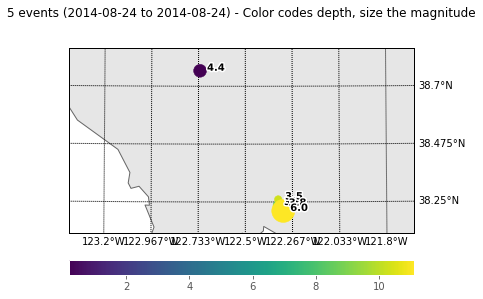

In [9]:
catalog.plot(projection="local", resolution="i", label="magnitude");

- un Catalog (modificato) può essere scritto in un file di output in un numbero differente di formati.

In [10]:
largest_magnitude_events.write("/tmp/large_events.xml", format="QUAKEML")
!ls -l /tmp/large_events.xml

-rw-r--r--  1 spina  wheel  5821 Apr 13 17:11 /tmp/large_events.xml


- le classi di tipo evento possono essere utilizzate per creare eventi/cataloghi/pick/... da zero in flussi di lavoro di elaborazione personalizzata e per condividerle con altri ricercatori nel formato standard QuakeML